![](img/shark.png)

# Global Shark Attack

Fecha de entrega: _23:59 05/04/2021_ 

### ¿En qué consiste este mini-proyecto?

El objetivo de este mini-proyecto es que os enfrentéis a realizar un Exploratory Data Analysis por primera vez, antes del proyecto EDA. 

Durante este mini-proyecto deberás poner en práctica todo lo aprendido durante las últimas semanas. Tanto cómo te haga falta y solo si te hace falta. Esta vez serás tú el qué tome la decisión de qué tratamientos o limpiezas y visualizaciones serán mejor para tratar tus datos. 

Mínimo deberás importar las siguientes librerías, aunque te animo a explorar otras librerías nuevas.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

Todo esto con el fin de poder verificar nuestra hipótesis. Sigue leyendo para más información.

### Dataset

El dataset que utilizaremos para este mini-proyecto contiene datos sobre los ataques de tiburones en el mundo: localicación, fechas, tipología, especie causante, información sobre las víctimas, etc.. 

Registrado por http://www.sharkattackfile.net/index.htm.

Te lo podrás descargar en este enlace: https://www.kaggle.com/teajay/global-shark-attacks

### Hipótesis
Elige una o varias de estas hipótesis para desarrollar tu mini proyecto.

Siéntete libre de establecer nuevas hipótesis que puedas validar o rechazar con tu análisis.

- El número de supervivientes ha aumentado con el paso de los años
- Todos los ataques producidos en la India, ocurren a primera hora de la mañana
- La mayoría de los ataques en los últimos 200 años tuvieron lugar en USA, Australia y Sudáfrica. 
- Las actividades con más riesgo de sufrir un ataque de tiburon son pescar y nadar. 
- La mayoría de los ataques de tiburón fueron fatales.
- Los tiburones tienen especial predilección por los surferos.
- Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos.
- En Sudáfrica hay más ataques letales a mujeres que en Australia.

### Github*
*_Este punto es opcional pero MUY recomendable, ya que en el Proyecto de EDA será obligatorio_

Crea un repositorio nuevo para guardar los archivos que necesites.

Sigue la siguiente estructuras de carpetas:

    - src -> aquí encontrarás el código, en este caso los notebooks que uses
    - input -> aquí guardarás el dataset que utilices
    - output -> aquí guardarás gráficas o datasets limpios, si los tuvieras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
%matplotlib inline

In [350]:
attack = pd.read_csv('attacks.csv',encoding='latin-1')

In [351]:
attack.shape

(25723, 24)

In [352]:
attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [353]:
attack.drop(['Unnamed: 22','Unnamed: 23'], axis = 1 , inplace = True)


In [354]:
attack.drop(['Case Number.2'], axis = 1 , inplace = True)

In [355]:
attack.drop(['href formula'], axis = 1 , inplace = True)

In [356]:
attack.drop(['Case Number.1'], axis = 1 , inplace = True)

In [357]:
attack.dropna(axis = 0, how = "all" ,inplace = True )

In [10]:
#attack.dropna(axis = 0, how = "any" ,inplace = True)

In [358]:
attack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [12]:
attack.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [13]:
attack.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href                      19421
Case Number.1             19421
original order            19414
dtype: int64

In [359]:
attack.set_index('original order',inplace=True)

In [15]:
attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href', 'Case Number.1'],
      dtype='object')

In [360]:
attack= attack.rename(columns={'Sex ' : 'Sex' , 'Fatal (Y/N)':'Survived (Y/N)'})

In [361]:
attack['Sobrevivio'] = attack['Survived (Y/N)'].map({'Y' : 'Yes', 'N' : 'No'})

In [362]:
attack.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Survived (Y/N),Time,Species,Investigator or Source,pdf,href,Sobrevivio
original order,,,,,,,,,,,,,,,,,,,
6303.0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
6302.0,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
6301.0,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
6300.0,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
6299.0,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No


#  1 .) El número de supervivientes ha aumentado con el paso de los años ?

In [19]:
example = attack.groupby('Year')[['Sobrevivio']].count().sort_values( by = 'Year' , ascending = False).head(20)
example

,Sobrevivio
Year,
2018.0,52
2017.0,123
2016.0,118
2015.0,130
2014.0,118
2013.0,114
2012.0,107
2011.0,118
2010.0,97


In [20]:
people_survived = attack[attack['Sobrevivio']== 'Yes']
people_survived.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Survived (Y/N),Time,Species,Investigator or Source,pdf,href,Case Number.1,Sobrevivio
original order,,,,,,,,,,,,,,,,,,,,
6297.0,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,Yes
6245.0,2017.11.30.a,30-Nov-2017,2017.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba diving,Rohina Bhandari,F,49,FATAL,Y,NaN,"Tiger shark, female",R. Arauz,2017.11.30.a-Bhandari.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.30.a,Yes
6244.0,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,Yes
6239.0,2017.11.04,04-Nov-2017,2017.0,Unprovoked,CUBA,Holquin Province,Guardalavaca Beach,Night bathing,Jesús Cabrera González,M,22,FATAL,Y,23h30,Tiger shark,TrackingSharks.com,2017.11.04-Cuba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.04,Yes
6212.0,2017.09.03.b,03-Sep-2017,2017.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Dyer Island,"Swimming, poaching abalone",Sivuyile Xelela,M,NaN,FATAL,Y,Morning,NaN,"All Africa, 10/11/2017",2017.09.03.b-Xelela.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.03.b,Yes


Text(0.5, 1.0, 'Numero de sobriviviente por años')

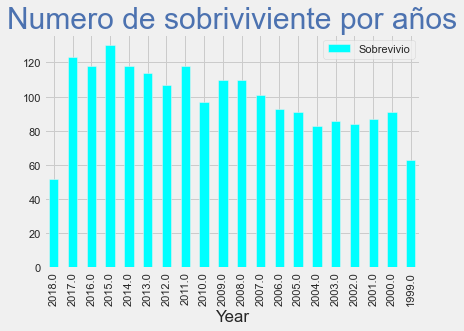

In [496]:

example.plot(kind = 'bar' ,color = 'cyan')
plt.title('Numero de sobriviviente por años', color = 'b',fontsize= 30 )


C:\Users\rafae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


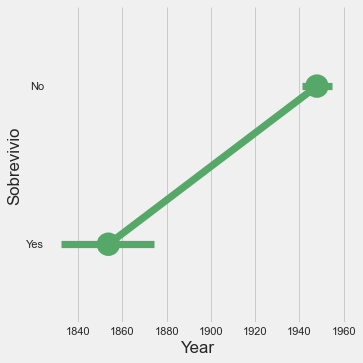

In [501]:
sns.catplot('Year', 'Sobrevivio', data = attack , kind = 'point' , color = 'g')

<AxesSubplot:xlabel='Year', ylabel='Density'>

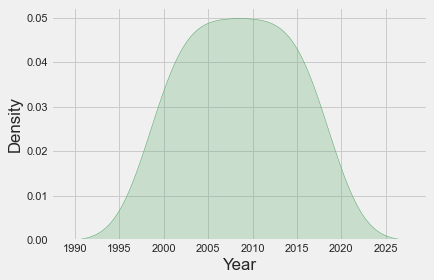

In [504]:
sns.kdeplot(data=example,x = 'Year' , shade = True , color = 'g' ,)

(1800.0, 2200.0)

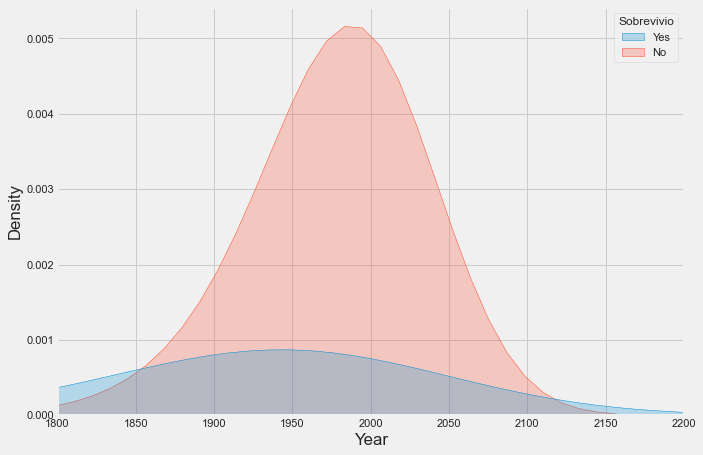

In [264]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=attack,x = 'Year' ,hue = 'Sobrevivio', shade = True  ,)
plt.xlim(1800,2200)

# 2.) Todos los ataques producidos en la India, ocurren a primera hora de la mañana

In [617]:
india.Time.values

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 13. ,
        nan,  nan,  nan,  nan,  nan,  nan, 11. ,  nan, 12. , 10. ,  nan,
        nan,  nan,  nan,  nan,  nan,  nan, 10.3,  nan, 19. , 18. , 19. ,
        nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [620]:
india['Time'] = india['Time'].apply(lambda x: str(x).replace('Evening','19:00'))
india['Time'] = india['Time'].apply(lambda x: str(x).replace('Before ',''))

<ipython-input-620-91da414235a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['Time'] = india['Time'].apply(lambda x: str(x).replace('Evening','19:00'))
<ipython-input-620-91da414235a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['Time'] = india['Time'].apply(lambda x: str(x).replace('Before ',''))


In [621]:
india['Time'] = india['Time'].apply(lambda x: str(x).replace('Evening','17:00'))

<ipython-input-621-6c7bc6d9545f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['Time'] = india['Time'].apply(lambda x: str(x).replace('Evening','17:00'))


In [627]:
india['Time'] = india['Time'].apply(lambda x: str(x).replace('17:00-',''))

<ipython-input-627-d116fc458c1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['Time'] = india['Time'].apply(lambda x: str(x).replace('17:00-',''))


In [625]:
india['Time'] = india['Time'].apply(lambda x: str(x).replace('h',':'))

<ipython-input-625-1c9be73e459c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['Time'] = india['Time'].apply(lambda x: str(x).replace('h',':'))


In [628]:
india.Time.values

array(['nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', '13:00', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', '11:00',
       'nan', '12:00', '10:00', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', '10:30', 'nan', '19:00', '18:00', '19:00', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan'], dtype=object)

In [608]:
#india.Time.infer_objects() # converti la columna en objeto para poder remplazarla

#india[['Time']] = india[['Time']].astype(float)


C:\Users\rafae\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [541]:
#Todos los ataques producidos en la India, ocurren a primera hora de la mañana

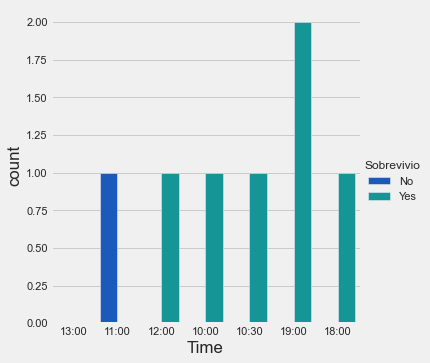

In [631]:
sns.catplot(x = 'Time', kind="count", data=india , hue = 'Sobrevivio',palette = 'winter')

In [618]:
india = attack[attack['Country']== 'INDIA']

In [630]:
india['Time'] = india['Time'].replace('nan', np.nan)

<ipython-input-630-8f84fb8e7ae8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['Time'] = india['Time'].replace('nan', np.nan)


In [580]:
india['Time'].dropna(inplace=True)

<ipython-input-580-8767fd29409d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india['Time'].dropna(inplace=True)


array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 13. ,
        nan,  nan,  nan,  nan,  nan,  nan, 11. ,  nan, 12. , 10. ,  nan,
        nan,  nan,  nan,  nan,  nan,  nan, 10.3,  nan, 19. , 18. , 19. ,
        nan,  nan,  nan,  nan,  nan,  nan,  nan])

# 3.) La mayoría de los ataques en los últimos 200 años tuvieron lugar en USA, Australia y Sudáfrica? 

In [80]:
attack = attack.sort_values('Country')

In [167]:
mayoria = attack[(attack['Country'] == 'USA') | (attack['Country'] == 'AUSTRALIA') | (attack['Country'] == 'SOUTHAFRICA')] 

In [168]:
mayoria.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Survived (Y/N),Time,Species,Investigator or Source,pdf,href,Sobrevivio
original order,,,,,,,,,,,,,,,,,,,
2204.0,1959.04.11,11-Apr-1959,1959.0,Unprovoked,AUSTRALIA,Torres Strait,"Coconut Island , 100 miles east of Thursday Is...",Diving for pearl shell,"Jimmy Pearson, a Torres Strait Islander",M,43,Left hand lacerated when he tried to ward off ...,N,NaN,"Tiger shark, 1.8 m [6']","G.P. Whitley ref. Sydney Morning Herald, 4/13/...",1959.04.11-Pearson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
5109.0,2008.10.22,22-Oct-2008,2008.0,Provoked,AUSTRALIA,New South Wales,"Oceanworld, Manley",Scuba diving,Steve Cloke,M,34,Small laceration to head from captive shark,N,17h20,"Grey nurse shark, 3m","Herald, 10/22/2008",2008.10.22-Clote.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
5107.0,2008.10.12,12-Oct-2008,2008.0,Provoked,AUSTRALIA,Northern Territory,Darwin,Fishing,Geoff Johnson,M,50,Right leg injured by hook and hooked shark PRO...,N,NaN,"reef shark, 1.8m","Northern Territory News, 10/14/2008",2008.10.12-Johnson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
489.0,1880.11.25,25-Nov-1880,1880.0,Unprovoked,AUSTRALIA,Queensland,"Petrie Bight, Brisbane River",Swimming,Alexey Drury,M,12,"Feet bitten, surgically amputated FATAL",Y,Afternoon,Bull shark,"Bucks County Gazette, 2/10/1881, Sunday Mail (...",1880.11.25-AlexeyDrury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
5106.0,2008.10.11,11-Oct-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Lake Macquarie,Surfing,male,M,15,"No injury, board damaged",N,15h30,NaN,"Herald, 10/12/2008",2008.10.11-LakeMacquarie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No


(1700.0, 2200.0)

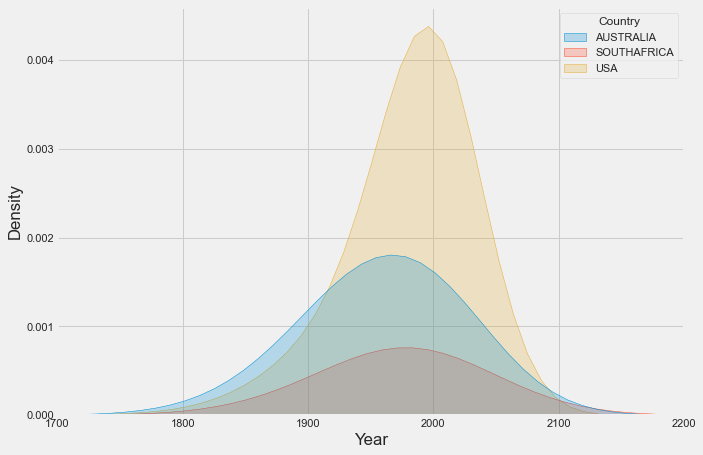

In [263]:
plt.figure(figsize=(10,7))
sns.kdeplot('Year', data = mayoria , hue = 'Country', shade = True )
plt.xlim(1700, 2200)

C:\Users\rafae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mayoria de Ataques')

<Figure size 720x504 with 0 Axes>

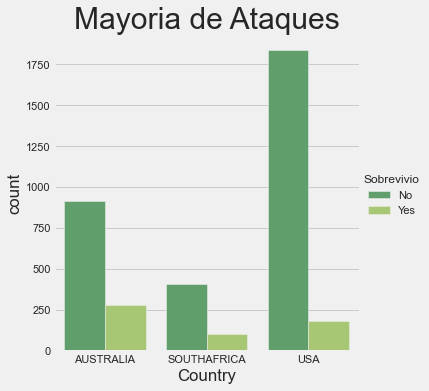

In [494]:
plt.figure(figsize=(10,7))
sns.catplot('Country', data = mayoria ,kind = 'count', palette = 'summer' , hue = 'Sobrevivio')
plt.title('Mayoria de Ataques',fontsize= 30)

(1700.0, 2050.0)

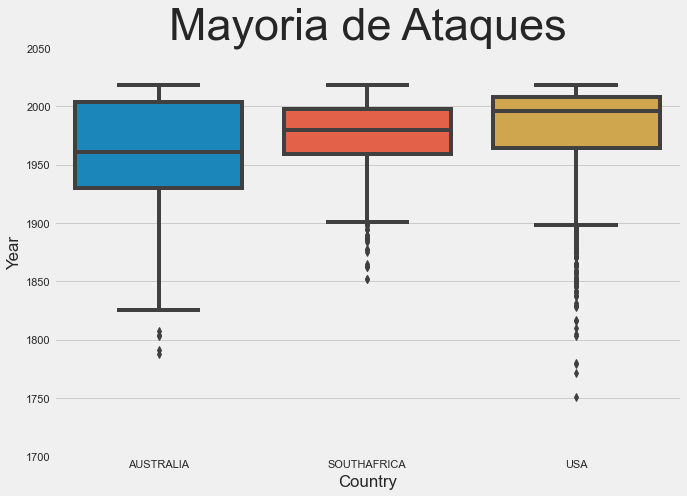

In [495]:
plt.figure(figsize=(10,7))
sns.boxplot(data= mayoria , y = 'Year', x = 'Country').set_title('Mayoria de Ataques',fontsize= 45)
plt.ylim(1700,2050)

In [165]:
attack['Country'].unique()
attack[attack['Country'].str.contains('AFRICA')]
attack[attack['Country']== 'SOUTHAFRICA']


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Survived (Y/N),Time,Species,Investigator or Source,pdf,href,Sobrevivio
original order,,,,,,,,,,,,,,,,,,,
2491.0,1962.06.21,21-Jun-1962,1962.0,Boat,SOUTHAFRICA,Western Cape Province,"Millers Point, False Bay","On a ""shark hunt""","2.4 m rowboat, occupants: Edgar Brown, Jerry W...",NaN,NaN,"No injury to occupants, shark charged boat, th...",N,21h00,2.7 m to 3 m [9' to 10'] sharks,"M. Levine, GSAF",1962.06.21-MillersPointBoat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
2746.0,1966.08.27.b,27-Aug-1966,1966.0,Invalid,SOUTHAFRICA,KwaZulu-Natal,Durban,Netting sharks,"trawler Jacoba, occupant Jan van der Bent",M,NaN,"No attack, no injury to occupant: a 400-lb gre...",NaN,NaN,Invalid,ISAF Case #1439,1966.08.27-Jacoba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN
5320.0,2010.10.01,01-Oct-2010,2010.0,Unprovoked,SOUTHAFRICA,Western Cape Province,"Melkbaai, Strand",Surfing,male,M,Teen,3 lacerations to foot,N,14h30,NaN,"News24.com, 10/1/2010",2010.10.01-Melkbaai-surfer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
3666.0,1990.04.14,14-Apr-1990,1990.0,Unprovoked,SOUTHAFRICA,Eastern Cape Province,Cape Recife,Lying on surfboard & paddling,Conrad Botha,M,23,Leg bitten,N,14h00,"2.3 m [7.5'] white shark, identified by M. Smale",M. Smale,1990.04.14-Botha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
2716.0,1966.01.29,29-Jan-1966,1966.0,Provoked,SOUTHAFRICA,Western Cape Province,Strandfontein Beach,Helping men land a shark,John Campbell,M,33,Left leg lacerated by hooked shark PROVOKED I...,N,Afternoon,Copper shark,"Daily News, 2/31/1966; J. Penrith & J. D'Aubrey",1966.01.29-Campbell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303.0,1932.00.00,1932,1932.0,Unprovoked,SOUTHAFRICA,Eastern Cape Province,"Kowie River Mouth, Port Alfred",Collecting fish by lamplight in gully,Manning Samuels,M,23,"Right shin, calf and sole of foot lacerated",N,After dusk,"Raggedtooth shark, 1.2 m to 1.5 m [4' to 5']","R. Samuels, K. Reynolds & M. Levine, GSAF",1932.00.00-Samuels.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
3498.0,1986.10.05,05-Oct-1986,1986.0,Unprovoked,SOUTHAFRICA,KwaZulu-Natal,St. Michaels,Racing ski,James Speirs,M,32,"No injury, ski bitten",N,11h00,1.6 m shark,"J. Spiers, M. Levine, GSAF; R. Dugmore, G. Cli...",1986.10.05-Spiers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
5041.0,2008.05.01,01-May-2008,2008.0,Provoked,SOUTHAFRICA,NaN,NaN,Fishing,male,M,24,Leg bitten by shark taken aboard Japanese traw...,N,NaN,NaN,National Sea Rescue Institute,2008.05.01-fisherman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No


In [363]:
attack['Country'] = attack['Country'].apply(lambda x : str(x).upper())


In [364]:
attack['Country'] = attack['Country'].apply(lambda x: x.replace('?',''))
attack['Country'] = attack['Country'].apply(lambda x: x.replace(' ',''))

In [365]:
#attack['Time'] = attack['Time'].apply(lambda x: x.replace('',''))

In [367]:
#attack['Time'] = attack['Time'].apply(lambda x: x.replace('>',''))

# 4.) Las actividades con más riesgo de sufrir un ataque de tiburon son pescar y nadar.

In [126]:
attack.head() # preguntar 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Survived (Y/N),Time,Species,Investigator or Source,pdf,href,Sobrevivio
original order,,,,,,,,,,,,,,,,,,,
1667.0,1944.10.26.a,26-Oct-1944,1944.0,Sea Disaster,PHILIPPINES,Bernardino Strait near Gulf of Leyte,NaN,USS Hoel DD 533 sunk on 10/24/1944 in the Batt...,2 men,M,NaN,"FATAL, both were killed by sharks",Y,NaN,NaN,"Glenn Hatch Parkin, gunner",1944.10.26.a-2men-incomplete.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
4624.0,2004.04.13.a,13-Apr-2004,2004.0,Invalid,TONGA,Nuku'alofa,30 nautical miles offshore,Five men on makeshift raft after their 10 m fi...,male 1,M,NaN,He was was bitten on the arm by small sharks &...,Y,NaN,Questionable Incident,"New Zealand Herald, 4/15/2004",2004.04.13.a-Tonga.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
4625.0,2004.04.13.b,13-Apr-2004,2004.0,Unprovoked,TONGA,Nuku'alofa,30 nautical miles offshore,Five men on makeshift raft after their 10 m fi...,male 2,M,NaN,"Bitten on feet, legs, back & abdomen but survi...",Y,NaN,small sharks,"New Zealand Herald, 4/15/2004",2004.04.13.b-Tonga.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
4268.0,2000.07.12,12-Jul-2000,2000.0,Unprovoked,TONGA,Minerva Reef,Treated at Nuku-alofa,Scuba diving,Christian Eckoff,M,69,Left arm bitten,N,NaN,"Grey reef shark, 2 m [6.75']",www.spearfishingsa.co.za,2000.07.12-Eckoff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
2517.0,1962.10.15,15-Oct-1962,1962.0,Unprovoked,ADMIRALTYISLANDS,Manus Island,Sisi (west coast of island),NaN,Pasingan,M,26,Facial lacerations,N,NaN,NaN,SAF Case #1116,1962.10.15-Pasigan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No


In [174]:
attack[['Activity']]

,Activity
original order,
1667.0,USS Hoel DD 533 sunk on 10/24/1944 in the Batt...
4624.0,Five men on makeshift raft after their 10 m fi...
4625.0,Five men on makeshift raft after their 10 m fi...
4268.0,Scuba diving
2517.0,NaN
...,...
700.0,Diving for coins
692.0,Wreck of the steamship Sultan of Bombay
672.0,Diving for coins


# 5.) La mayoría de los ataques de tiburón fueron fatales?

In [187]:
fatal =attack[attack['Injury']== 'FATAL']
fatal

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Survived (Y/N),Time,Species,Investigator or Source,pdf,href,Sobrevivio
original order,,,,,,,,,,,,,,,,,,,
254.0,1846.09.30.R,Reported 30-Sep-1846,1846.0,Unprovoked,AFRICA,NaN,NaN,Jumped into river,male,M,NaN,FATAL,Y,NaN,NaN,"Hartford Courant, 9/30/1846",1846.08.30.R-Marryatt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
245.0,1844.07.16.R,1844.07.16.R,1844.0,Unprovoked,ALGERIA,NaN,Cape Matifou,Swimming,male,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1844.07.16.R-Algeria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
1987.0,1954.12.29,29-Dec-1954,1954.0,Unprovoked,AMERICANSAMOA,Tutuila Island,Near tuna cannery in Pago Pago Harbor,Dived overboard & was swimming near stern of t...,"Kosuo Mizokawa, Captain of a Japanese trawler",M,27,FATAL,Y,NaN,NaN,"Townsville Daily Bulletin, 1/6/1955",1954.12.29-Mizokawa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
344.0,1863.00.00.R4,1863,1863.0,Unprovoked,ANDAMANISLANDS,NaN,NaN,Fell overboard,a local fisherman,M,NaN,FATAL,Y,10h00,NaN,"North Adams Transcript, 3/18/1898",1863.00.00.R4-AndamanIslands.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
5978.0,2015.12.19,19-Dec-2015,2015.0,Unprovoked,ARUBA,NaN,Boat capsized,Sea disaster,Adrian Esteban Rafael,M,58,FATAL,Y,NaN,NaN,"Fox News, 12/11/2015",2015.12.19-Aruba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968.0,1972.04.16,16-Apr-1972,1972.0,Unprovoked,WESTERNSAMOA,Upolu Island,Nuulua,Swimming,"Alan Banner, Peace Corps volunteer",M,25,FATAL,Y,NaN,Thought to involve a tiger shark,J. Gregory,1972.04.16-Banner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
700.0,1898.00.00.a,Summer of 1898,1898.0,Unprovoked,YEMEN,Aden,Harbor,Diving for coins,male,M,NaN,FATAL,Y,NaN,NaN,"Daily Kennebec Journal, 3/27/1911",1898.00.00.a-AdenDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
692.0,1897.06.09,09-Jun-1897,1897.0,Sea Disaster,YEMEN,Socotra Islands,Socotra,Wreck of the steamship Sultan of Bombay,Moslem pilgrims,NaN,NaN,FATAL,Y,NaN,NaN,"Star, 7/10/1897; Kalgoorlie Western Argus, 7/1...",1897.06.09-Sultan-of-Bombay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes


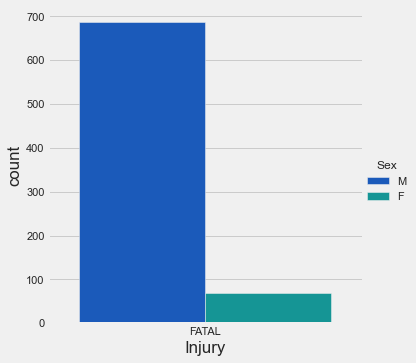

In [260]:
sns.catplot(x = 'Injury', kind="count", data=fatal , hue = 'Sex',palette = 'winter')

 # 6.) Los tiburones tienen especial predilección por los surferos? 

In [278]:
surferos[surferos['Sobrevivio']== 'Yes']

(53, 19)

In [225]:
surferos= attack[attack['Activity'].str.contains('Surf') == True]
#attack[attack['Activity'].fillna(0)
#attack['Activity'].str.contains('Surf', na=False)



In [258]:
sns.set(style='ticks')
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Surfistas')

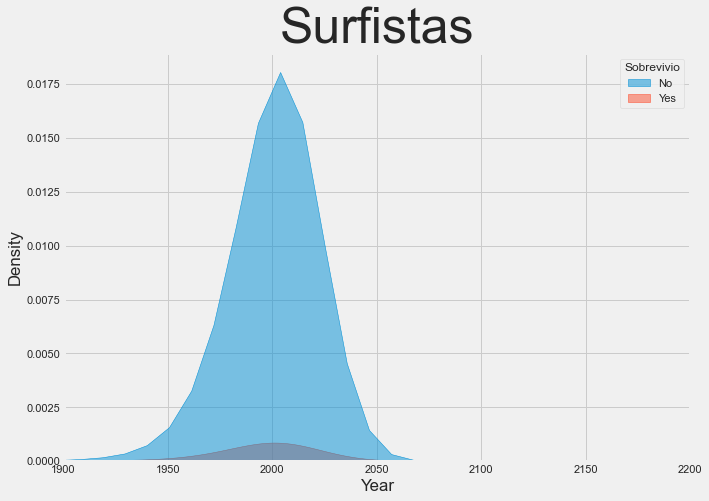

In [288]:
plt.figure(figsize=(10,7))
sns.kdeplot('Year', data = surferos , hue = 'Sobrevivio', shade = True ,alpha=.5)
plt.xlim(1900, 2200)
plt.title('Surfistas',fontsize= 50)

# 7.)Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos.

In [345]:
cant_ataques= attack.groupby('Country')[['Survived (Y/N)']].count().sort_values(by='Survived (Y/N)').tail(20)
cant_ataques

,Survived (Y/N)
Country,
PANAMA,31
INDIA,34
SPAIN,34
EGYPT,35
MOZAMBIQUE,40
CUBA,41
NAN,43
NEWCALEDONIA,52
ITALY,54


Text(0.5, 1.0, 'Mayor cantidad de Muertes')

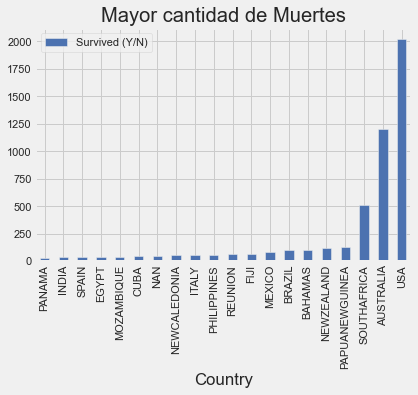

In [372]:

cant_ataques.plot(kind = 'bar' , color = 'b' )
plt.title('Mayor cantidad de Muertes')

In [349]:
attack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Survived (Y/N),Time,Species,Investigator or Source,pdf,href,Sobrevivio
original order,,,,,,,,,,,,,,,,,,,
1667.0,1944.10.26.a,26-Oct-1944,1944.0,Sea Disaster,PHILIPPINES,Bernardino Strait near Gulf of Leyte,NaN,USS Hoel DD 533 sunk on 10/24/1944 in the Batt...,2 men,M,NaN,"FATAL, both were killed by sharks",NaN,NaN,NaN,"Glenn Hatch Parkin, gunner",1944.10.26.a-2men-incomplete.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
4624.0,2004.04.13.a,13-Apr-2004,2004.0,Invalid,TONGA,Nuku'alofa,30 nautical miles offshore,Five men on makeshift raft after their 10 m fi...,male 1,M,NaN,He was was bitten on the arm by small sharks &...,NaN,NaN,Questionable Incident,"New Zealand Herald, 4/15/2004",2004.04.13.a-Tonga.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
4625.0,2004.04.13.b,13-Apr-2004,2004.0,Unprovoked,TONGA,Nuku'alofa,30 nautical miles offshore,Five men on makeshift raft after their 10 m fi...,male 2,M,NaN,"Bitten on feet, legs, back & abdomen but survi...",NaN,NaN,small sharks,"New Zealand Herald, 4/15/2004",2004.04.13.b-Tonga.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
4268.0,2000.07.12,12-Jul-2000,2000.0,Unprovoked,TONGA,Minerva Reef,Treated at Nuku-alofa,Scuba diving,Christian Eckoff,M,69,Left arm bitten,NaN,NaN,"Grey reef shark, 2 m [6.75']",www.spearfishingsa.co.za,2000.07.12-Eckoff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
2517.0,1962.10.15,15-Oct-1962,1962.0,Unprovoked,ADMIRALTYISLANDS,Manus Island,Sisi (west coast of island),NaN,Pasingan,M,26,Facial lacerations,NaN,NaN,NaN,SAF Case #1116,1962.10.15-Pasigan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700.0,1898.00.00.a,Summer of 1898,1898.0,Unprovoked,YEMEN,Aden,Harbor,Diving for coins,male,M,NaN,FATAL,NaN,NaN,NaN,"Daily Kennebec Journal, 3/27/1911",1898.00.00.a-AdenDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
692.0,1897.06.09,09-Jun-1897,1897.0,Sea Disaster,YEMEN,Socotra Islands,Socotra,Wreck of the steamship Sultan of Bombay,Moslem pilgrims,NaN,NaN,FATAL,NaN,NaN,NaN,"Star, 7/10/1897; Kalgoorlie Western Argus, 7/1...",1897.06.09-Sultan-of-Bombay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
672.0,1895.09.14.R,Reported 14-Sep-1895,1895.0,Unprovoked,YEMEN,Aden,NaN,Diving for coins,a native boy,M,NaN,FATAL,NaN,NaN,NaN,"Queenslander, 9/14/8/1895",1895.09.14.R-Aden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes


In [307]:
attack[attack['Country'].str.contains('REUNION')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Survived (Y/N),Time,Species,Investigator or Source,pdf,href,Sobrevivio
original order,,,,,,,,,,,,,,,,,,,
4042.0,1997.02.20,20-Feb-1997,1997.0,Unprovoked,REUNION,L'Etang-Sale,NaN,NaN,Laurent Lebon,M,NaN,Hand injured,N,NaN,NaN,"LeQuotidien, 12/4/1999",1997.02.20-Lebon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
5447.0,2011.10.05,05-Oct-2011,2011.0,Boating,REUNION,NaN,Cap La Houssaye,Canoeing,Jean-Pierre Castellani,M,51,No injury to occupant,N,10h30,2 to 2.5 m shark,"Clicanoo, 10/5/2011",2011.10.05-Castellani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
3557.0,1988.03.14,14-Mar-1988,1988.0,Unprovoked,REUNION,Saint-Pierre,Pic du Diable,Surfing,Frédéric Mousseau,M,NaN,Laceration to hand,N,18h30 (Sunset),NaN,G. Van Grevelynghe,1988.03.14-Mousseau.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
5885.0,2015.06.01,01-Jun-2015,2015.0,Unprovoked,REUNION,Le Port,Folette,Surfing,Eddy Chaussalet,M,47,Left forearm bitten,N,15h00,"Bull shark, 2.5 m","Clincanoo, 6/1/2015",2015.06.01-Chaussalet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
3961.0,1995.09.16,16-Sep-1995,1995.0,Unprovoked,REUNION,Saint-Denis,NaN,Body-boarding,Jerome Pruneaux,M,NaN,FATAL,Y,NaN,NaN,"LeQuotidien, 12/4/1999",1995.09.16-Pruneaux.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457.0,2011.11.11,11-Nov-2011,2011.0,Unprovoked,REUNION,Bois-Blanc,Sainte-Rose,Free diving / spearfishing,Jean-Paul Delaunay,M,42,Left foot bitten,N,Morning,NaN,"H. Nickel & A. Brenneka, SharkAttackSurvivors.com",2011.11.11-Delaunay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
6154.0,2017.04.29.a,29-Apr-2017,2017.0,Unprovoked,REUNION,Saint-Leu,Pointe au Sal,Body boarding,Adrien Dubosc,M,28,FATAL,Y,11h15,NaN,"Clicanoo, 4/29/2017",2017.04.29.a-Dubosc.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
4095.0,1998.00.00.b,1998,1998.0,Unprovoked,REUNION,Beaufonds,NaN,Diving,NaN,NaN,NaN,FATAL,Y,NaN,NaN,G. Van Grevelynghe,1998.00.00.b-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes


# 8.) En Sudáfrica hay más ataques letales a mujeres que en Australia?

In [462]:
ejemplo8= attack[(attack['Country'] == 'AUSTRALIA') | (attack['Country'] == 'SOUTHAFRICA')]
ejemplo8 = ejemplo8[ejemplo8['Sex'] == 'F']


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Survived (Y/N),Time,Species,Investigator or Source,pdf,href,Sobrevivio
original order,,,,,,,,,,,,,,,,,,,
6289.0,2018.05.00,May 2018,2018.0,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,N,NaN,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
6263.0,2018.02.23,23-Feb-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Little Congwong Beach, La Perouse",Swimming,Anna Shurapey,F,55,Laceratons to right leg & foot,N,"19h00, Dusk","Juvenile white shark, 2.7 to 3.2 m","B. Myatt, GSAF",2018.02.23-Shurapey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
6260.0,2018.02.14,14-Feb-2018,2018.0,Invalid,AUSTRALIA,Queensland,Mooloolaba Beach,Swimming,Sharna Babd,F,NaN,"Collision / No injury, no attack",N,18h00,Possibly a wobbegong,"Sunshine Coast Daily, 2/15/2018",2018.02.14-Babd.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
6232.0,2017.10.22,22-Oct-2017,2017.0,Unprovoked,AUSTRALIA,South Australia,Normanville,Kayaking / Fishing,Sarah Williams,F,15,Minor injuries,N,Afternoon,"White shark, 4.5 m","Nine News, 10/22/2017",2017.10.22-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
6180.0,2017.07.07,07-Jul-2017,2017.0,Unprovoked,SOUTHAFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,13,"No injury, shark bit surfboard",N,15h00,"White shark, 2.5 m","Dispatch Live, 7/7/2027",2017.07.07-Stein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301.0,1855.04.09.R,Reported 09-Apr-1855,1855.0,Unprovoked,AUSTRALIA,South Australia,Port Wakefield,Fell overboard from the Malacca,child,F,2½,FATAL,Y,NaN,NaN,"The Argus, 4/9/1855",1855.04.09.R-Malacca-child.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes
218.0,1832.06.04,04-Jun-1832,1832.0,Unprovoked,AUSTRALIA,New South Wales,"South Head, Sydney",Fishing,Aboriginal female,F,NaN,Leg severed,N,NaN,NaN,"Sydney Herald, 6/11/1832",1832.06.04-AboriginalWoman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,No
168.0,1791.00.00,1791,1791.0,Unprovoked,AUSTRALIA,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",F,NaN,"FATAL, ""bitten in two""",Y,NaN,NaN,"G.P. Whitley; D. Baldridge, p.162",1791.00.00-aboriginal woman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Yes


Text(0.5, 1.0, 'Ataques a Mujeres')

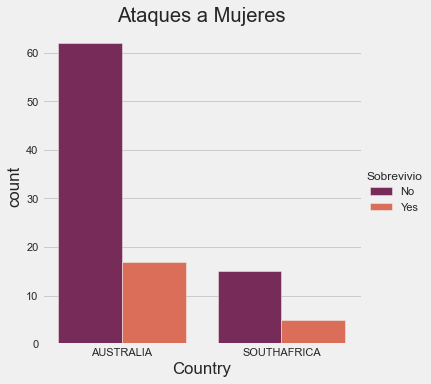

In [478]:
sns.catplot(x = 'Country', data = ejemplo8, kind = 'count' , hue = 'Sobrevivio' , palette = "rocket")
plt.title('Ataques a Mujeres')

<Figure size 2160x720 with 0 Axes>

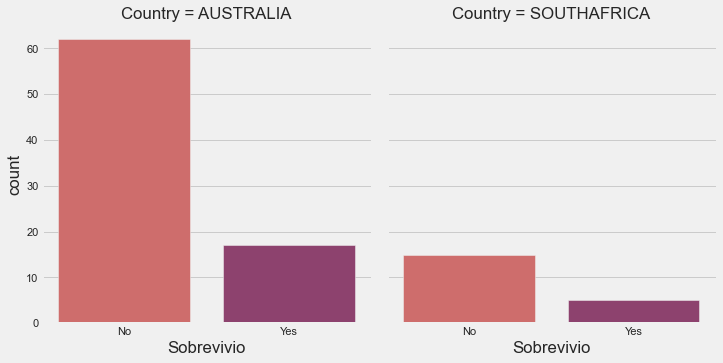

In [480]:
plt.figure(figsize=(30,10));
sns.catplot(x='Sobrevivio', 
           col = 'Country',
           col_wrap = 2,
           data = ejemplo8,
           kind = "count",
           palette = "flare")

